In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
d=pd.read_csv('/content/drive/MyDrive/ESPECIALIZACION/I SEMESTRE/0. Monografía/train_data_PREPARADO.csv')

In [6]:
d

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,attrition
0,28,57387,1,1,2381060,2,8.0,0,0,0,0,1,0
1,28,57387,1,1,-665480,2,39.0,0,0,0,0,1,0
2,28,57387,1,1,0,2,68.0,0,0,0,0,1,1
3,31,67016,2,2,0,1,25.0,0,0,0,0,1,0
4,43,65603,2,2,0,1,25.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32915,35,47440,2,2,0,1,38.0,0,1,1,0,0,1
32916,37,75133,3,3,0,1,78.0,0,0,0,1,0,1
32917,31,45720,1,1,103580,1,637.0,0,1,0,0,1,1
32918,33,30106,1,1,0,1,159.0,0,0,0,1,0,1


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32920 entries, 0 to 32919
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       32920 non-null  int64  
 1   Salary                    32920 non-null  int64  
 2   Joining Designation       32920 non-null  int64  
 3   Designation               32920 non-null  int64  
 4   Total Business Value      32920 non-null  int64  
 5   Quarterly Rating          32920 non-null  int64  
 6   retention_days            32920 non-null  float64
 7   promoted                  32920 non-null  int64  
 8   GenderBin                 32920 non-null  int64  
 9   Education_Level_Bachelor  32920 non-null  int64  
 10  Education_Level_College   32920 non-null  int64  
 11  Education_Level_Master    32920 non-null  int64  
 12  attrition                 32920 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.3 MB


In [8]:
d.columns.values

array(['Age', 'Salary', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'retention_days',
       'promoted', 'GenderBin', 'Education_Level_Bachelor',
       'Education_Level_College', 'Education_Level_Master', 'attrition'],
      dtype=object)

In [ ]:
plt.figure(figsize=(1,1))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(d['attrition'])

plt.show()

In [10]:
d['attrition'].value_counts()

0    16460
1    16460
Name: attrition, dtype: int64

In [11]:
#d.rename(columns={'Joining Designation': 'Joining_Designation'}, inplace=True)

### Dividir el conjunto de datos

In [12]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='attrition')
y = d['attrition']

In [13]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

In [14]:
numCols=X.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,28,57387,1,1,2381060,2,8.0,0,0,0,0,1
1,28,57387,1,1,-665480,2,39.0,0,0,0,0,1
2,28,57387,1,1,0,2,68.0,0,0,0,0,1
3,31,67016,2,2,0,1,25.0,0,0,0,0,1
4,43,65603,2,2,0,1,25.0,0,0,0,0,1


In [15]:
num_vars=numCols

In [16]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
11733,0.9189,0.3285,0.0000,0.2500,0.2457,1.0000,0.2476,1.0000,0.0000,1.0000,0.0000,0.0000
25156,0.5405,0.2445,0.2500,0.2500,0.2030,0.0000,0.0487,0.0000,1.0000,0.0000,1.0000,0.0000
24662,0.2973,0.1960,0.0000,0.0000,0.2030,0.0000,0.0848,0.0000,0.0000,1.0000,0.0000,0.0000
1306,0.3243,0.4163,0.5000,0.5000,0.2504,0.6667,0.0433,0.0000,1.0000,0.0000,0.0000,1.0000
4939,0.5405,0.4039,0.5000,0.5000,0.2098,0.0000,0.0693,0.0000,1.0000,0.0000,0.0000,1.0000


#### Creación y entrenamiento del modelo

In [17]:
#Creación y entrenamiento de los modelos

modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)

### Evaluación del modelo

In [18]:
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN      = ModelNN.predict(X_test)

#### Exactitud (Accuracy)

In [19]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelSVC      :",metrics.accuracy_score(y_test, y_SVC      ))
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN       :",metrics.accuracy_score(y_test, y_NN      ))


===== Accuracy de los modelos ====================

modelSVC      : 0.7867557715674363
modelLR       : 0.6591737545565006
modelknn      : 0.7890340218712029
modelComplNB  : 0.7506075334143378
modelTreeClas : 0.5451093560145808
modelRanForest: 0.7091433778857837
ModelNN       : 0.5147326852976913


#### Matriz de confusión

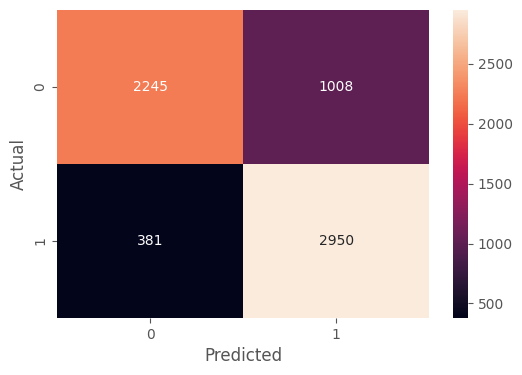

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3253
           1       0.75      0.89      0.81      3331

    accuracy                           0.79      6584
   macro avg       0.80      0.79      0.79      6584
weighted avg       0.80      0.79      0.79      6584



In [21]:
y_pred = y_knn

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

0.86: SVC(kernel='linear', probability=True)
0.84: LogisticRegression(random_state=0)
0.86: KNeighborsClassifier(n_neighbors=31)
0.79: ComplementNB()
0.55: DecisionTreeClassifier(random_state=0)
0.83: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=0)
0.82: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=0,
              solver='lbfgs')


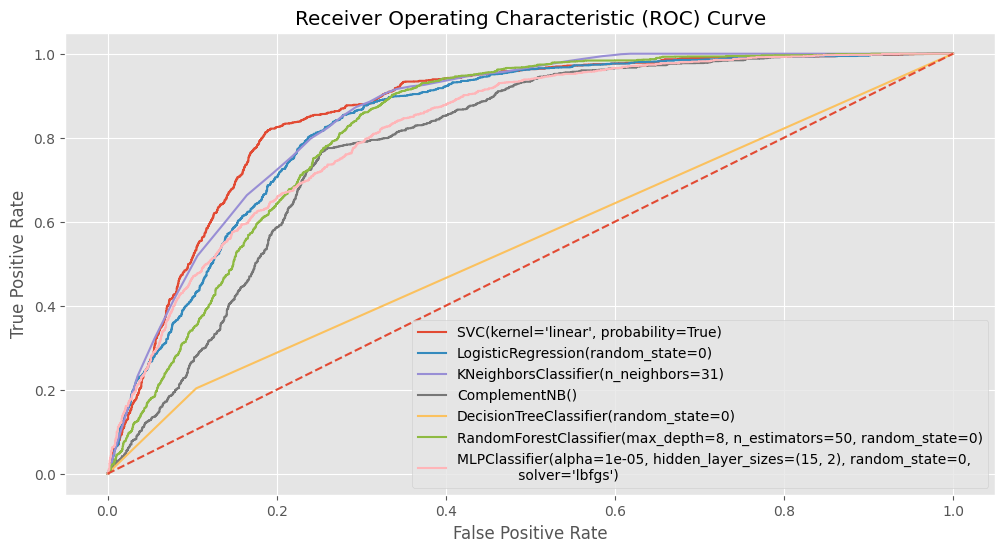

In [22]:
# Crear figura de tamaño 10x6
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos = [modelSVC, modelLR, modelknn, modelComplNB, modelTreeClas, modelRanForest, ModelNN]

# Iterar sobre los modelos
for i in range(len(Modelos)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico


### Validación Cruzada (***Cross validation***)

#### Selecionar el conjunto de datos

In [23]:
d

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,attrition
0,28,57387,1,1,2381060,2,8.0000,0,0,0,0,1,0
1,28,57387,1,1,-665480,2,39.0000,0,0,0,0,1,0
2,28,57387,1,1,0,2,68.0000,0,0,0,0,1,1
3,31,67016,2,2,0,1,25.0000,0,0,0,0,1,0
4,43,65603,2,2,0,1,25.0000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32915,35,47440,2,2,0,1,38.0000,0,1,1,0,0,1
32916,37,75133,3,3,0,1,78.0000,0,0,0,1,0,1
32917,31,45720,1,1,103580,1,637.0000,0,1,0,0,1,1
32918,33,30106,1,1,0,1,159.0000,0,0,0,1,0,1


In [24]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='attrition')
y = d['attrition']

# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

#### Escalar variables

In [25]:
numCols=X_Completo.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

In [26]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['Age', 'Salary', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating', 'retention_days', 'promoted', 'GenderBin', 'Education_Level_Bachelor', 'Education_Level_College', 'Education_Level_Master']


In [27]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])


X_Completo[num_vars].head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,0.1892,0.2625,0.0000,0.0000,0.2109,0.3333,0.0029,0.0000,0.0000,0.0000,0.0000,1.0000
1,0.1892,0.2625,0.0000,0.0000,0.1342,0.3333,0.0139,0.0000,0.0000,0.0000,0.0000,1.0000
2,0.1892,0.2625,0.0000,0.0000,0.1510,0.3333,0.0243,0.0000,0.0000,0.0000,0.0000,1.0000
3,0.2703,0.3167,0.2500,0.2500,0.1510,0.0000,0.0089,0.0000,0.0000,0.0000,0.0000,1.0000
4,0.5946,0.3088,0.2500,0.2500,0.1510,0.0000,0.0089,0.0000,0.0000,0.0000,0.0000,1.0000


In [28]:
X_Completo[num_vars]

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,retention_days,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,0.1892,0.2625,0.0000,0.0000,0.2109,0.3333,0.0029,0.0000,0.0000,0.0000,0.0000,1.0000
1,0.1892,0.2625,0.0000,0.0000,0.1342,0.3333,0.0139,0.0000,0.0000,0.0000,0.0000,1.0000
2,0.1892,0.2625,0.0000,0.0000,0.1510,0.3333,0.0243,0.0000,0.0000,0.0000,0.0000,1.0000
3,0.2703,0.3167,0.2500,0.2500,0.1510,0.0000,0.0089,0.0000,0.0000,0.0000,0.0000,1.0000
4,0.5946,0.3088,0.2500,0.2500,0.1510,0.0000,0.0089,0.0000,0.0000,0.0000,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
32915,0.3784,0.2065,0.2500,0.2500,0.1510,0.0000,0.0136,0.0000,1.0000,1.0000,0.0000,0.0000
32916,0.4324,0.3624,0.5000,0.5000,0.1510,0.0000,0.0278,0.0000,0.0000,0.0000,1.0000,0.0000
32917,0.2703,0.1968,0.0000,0.0000,0.1536,0.0000,0.2274,0.0000,1.0000,0.0000,0.0000,1.0000
32918,0.3243,0.1090,0.0000,0.0000,0.1510,0.0000,0.0568,0.0000,0.0000,0.0000,1.0000,0.0000


#### Ejecucion de diferentes modelos

In [29]:
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelSVC', modelSVC),
    ('modelLR', modelLR),
    ('modelknn', modelknn),
    ('modelComplNB', modelComplNB),
    ('modelTreeClas', modelTreeClas),
    ('modelRanForest', modelRanForest),
    ('modelNN', ModelNN)
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_Completo, y_Completo, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelSVC,0.7615,0.7097,0.8852,0.7878
1,modelSVC,0.7919,0.7409,0.8979,0.8119
2,modelSVC,0.7801,0.7364,0.8724,0.7987
3,modelSVC,0.7749,0.7275,0.8791,0.7961
4,modelSVC,0.7740,0.7253,0.8821,0.7961
...,...,...,...,...,...
65,modelNN,0.7904,0.7454,0.8821,0.8080
66,modelNN,0.7889,0.7372,0.8979,0.8096
67,modelNN,0.8104,0.7701,0.8852,0.8236
68,modelNN,0.7846,0.7318,0.8985,0.8067


#### Evaluación de los modelos

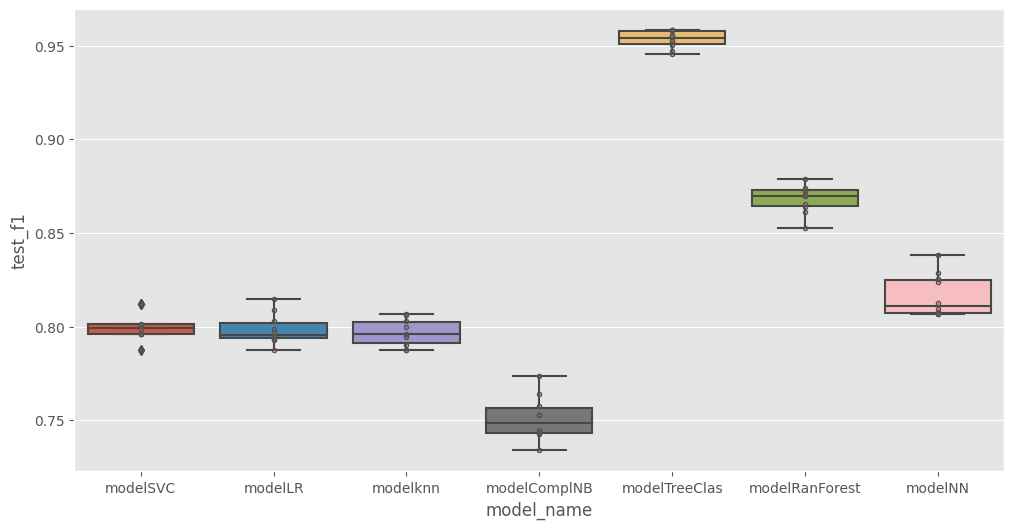

In [38]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

In [31]:
# impresión de los f1-score de los modelos evaluados
cv_df.groupby('model_name')['test_f1'].mean().sort_values(ascending=False)

model_name
modelTreeClas    0.9534
modelRanForest   0.8681
modelNN          0.8166
modelSVC         0.8001
modelLR          0.7984
modelknn         0.7968
modelComplNB     0.7509
Name: test_f1, dtype: float64

In [32]:
# Impresión de la desvición estándar de f1-score de los modelos evaluados

cv_df.groupby('model_name')['test_f1'].std().sort_values(ascending=True)

model_name
modelTreeClas    0.0045
modelknn         0.0071
modelSVC         0.0073
modelRanForest   0.0076
modelLR          0.0082
modelNN          0.0113
modelComplNB     0.0118
Name: test_f1, dtype: float64

In [33]:
# Impresión de las métricas para un modelo
print(cv_df[cv_df['model_name'] == 'modelTreeClas'])

       model_name  test_accuracy  test_precision  test_recall  test_f1
40  modelTreeClas         0.9426          0.8970       1.0000   0.9457
41  modelTreeClas         0.9538          0.9155       1.0000   0.9559
42  modelTreeClas         0.9563          0.9196       1.0000   0.9581
43  modelTreeClas         0.9478          0.9054       1.0000   0.9503
44  modelTreeClas         0.9563          0.9196       1.0000   0.9581
45  modelTreeClas         0.9499          0.9089       1.0000   0.9523
46  modelTreeClas         0.9441          0.8995       1.0000   0.9471
47  modelTreeClas         0.9529          0.9139       1.0000   0.9550
48  modelTreeClas         0.9508          0.9104       1.0000   0.9531
49  modelTreeClas         0.9563          0.9196       1.0000   0.9581


In [42]:
# Impresión de la metrica media y mediana de f1-score para un modelo espefífico

print(cv_df[cv_df['model_name'] == 'modelTreeClas']['test_f1'].median())
print(cv_df[cv_df['model_name'] == 'modelTreeClas']['test_f1'].mean())

1.0
1.0
